## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Описание данных

<b>Данные для первой части</b>


Файл /datasets/hypothesis.csv 

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<b>Данные для второй части</b>


Файл /datasets/orders.csv

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


Файл /datasets/visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Библиотеки

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Посчитаем ICE для гипотез. Добавим полученные значения ICE к существующей таблице. Новый столбец назовём ICE. 

Выведим столбцы 'hypothesis' и 'ICE', отсортированные по столбцу 'ICE'.

In [3]:
data['ICE'] = data['Impact'] * data['Confidence'] / data['Efforts']

display(data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Посчитаем RICE для гипотез. Добавим полученные значения RICE к существующей таблице. Новый столбец назовём RICE.

Выведим из получившейся таблицы столбцы 'hypothesis' и 'RICE', отсортированные по столбцу 'RICE'.

In [4]:
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']

display(data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Наиболее перспектвные гипотезы: 7, 2, 0 и 6. Однако на первом месте уже гипотеза под номером 7. Так получилось, потому что ее параметр Reach равен 10, в то время как у других гипотез он меньше.

## Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Проанализируем А/В тест.

In [5]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Проверим, есть ли пользователи, которые попали в две группы одновременно. Для этого вызовем функцию из numpy, ей передадим два массива, а она вернет те значения, которые встречаются в обоих массивах. В Данном случае массивы - это список уникальных visitorId в каждой группе, в формате array

In [6]:
mutual_visitors = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
mutual_visitors

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

Отфильтруем таблицу от повторяющихся пользователей:

In [7]:
orders = orders[~orders['visitorId'].isin(mutual_visitors)]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [8]:
orders.drop_duplicates()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [9]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [10]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [11]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
visitors.drop_duplicates()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Посмотрели общую информацию о данных, удалили пользователей, попавших в обе группы, удалили дубликаты.

Данные готовы к анализу.

### Построим график кумулятивной выручки по группам.

Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавимся от дубликатов методом drop_duplicates()

In [14]:
datesGroups = orders[['date','group']].drop_duplicates()

Объявим переменную ordersAggregated, содержащую:

- дату;
- группу A/B-теста;
- число уникальных заказов в группе теста по указанную дату включительно;
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
- суммарную выручку заказов в группе теста по указанную дату включительно.

Отсортируем по столбцам 'date', 'group'.

In [15]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объявиим переменную visitorsAggregated, содержащую:

- дату;
- группу A/B-теста;
- количество уникальных посетителей в группе теста по указанную дату включительно.

Отсортируем по столбцам 'date', 'group'.

In [16]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge().

Присвоим столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [17]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
5,2019-08-03,B,54,53,288850,1803
6,2019-08-04,A,77,71,388030,2562
7,2019-08-04,B,68,66,385740,2573
8,2019-08-05,A,99,92,474413,3318
9,2019-08-05,B,89,87,475648,3280


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


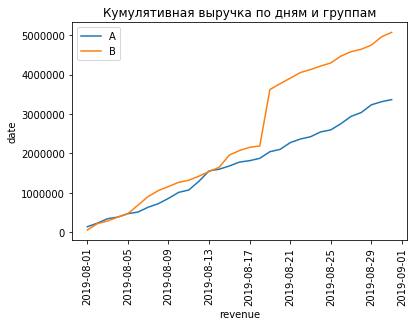

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по дням и группам')
plt.xlabel('revenue')
plt.ylabel('date')
plt.xticks(rotation=90)
plt.legend() 
plt.show()

Выручка увеличивается в течении всего теста. Однако график выручки группы В в после 2019-08-17 резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построим график кумулятивного среднего чека по группам.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

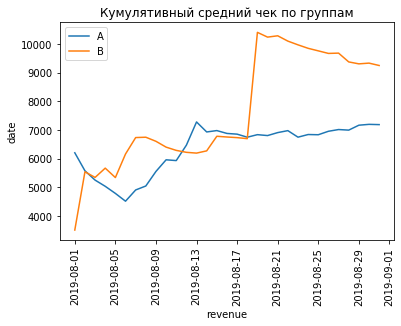

In [19]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('revenue')
plt.ylabel('date')
plt.xticks(rotation=90)
plt.legend() 
plt.show()

Средний чек группы А становится равномерным в середине теста, т.е. он установился. Средний чек с середины теста продолжает падать для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline():

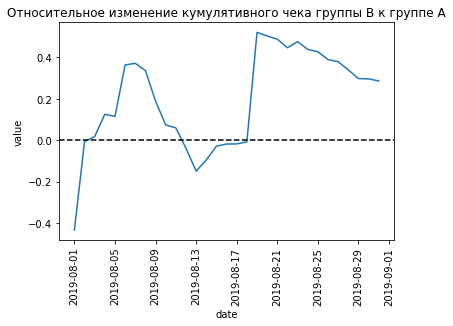

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного чека группы В к группе А')
plt.xlabel('date')
plt.ylabel('value')
plt.xticks(rotation=90)
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы!

### Построим график кумулятивной конверсии по группам. 

Аналогично проанализируем график кумулятивной конверсии. Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-08-01", '2019-08-31', 0, 0.015]:

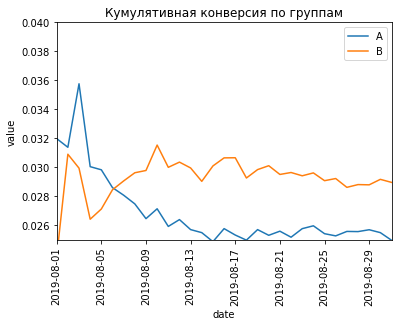

In [21]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.025, 0.04]) 
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('date')
plt.ylabel('value')
plt.xticks(rotation=90)
plt.show()

Конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

Построим график относительного различия кумулятивных конверсий:

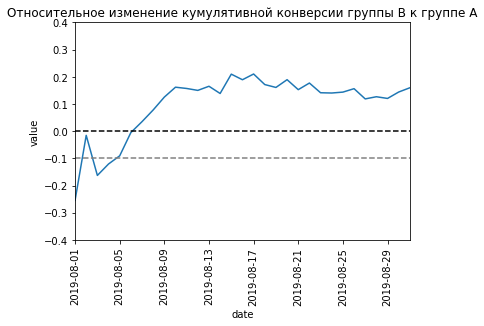

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.4, 0.4]) 
plt.title('Относительное изменение кумулятивной конверсии группы В к группе А')
plt.xlabel('date')
plt.ylabel('value')
plt.xticks(rotation=90)
plt.show()

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия немного "скакала", но теперь более менее зафиксировалась в пределахзначений 0.1-0.2.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

### Построим точечный график количества заказов по пользователям

In [23]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['vsitorId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,vsitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Аномального количества заказов на пользователя - нет. Пользователи совершают максимум 3 заказа в месяц.

Построим гистрограмму распределения количества заказов на одного пользователя.

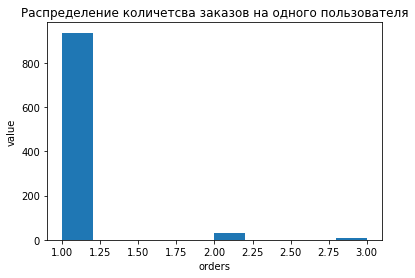

In [24]:
plt.hist(ordersByUsers['orders']) 
plt.title('Распределение количетсва заказов на одного пользователя')
plt.xlabel('orders')
plt.ylabel('value')
plt.show()

Построим точечную диаграмму числа заказов на одного пользователя:

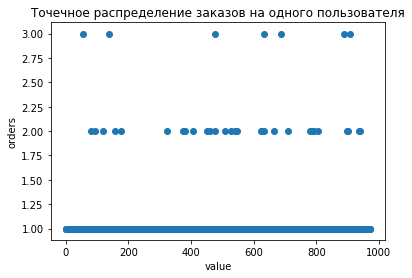

In [25]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечное распределение заказов на одного пользователя')
plt.xlabel('value')
plt.ylabel('orders')
plt.show()

Много пользователей совершивших 1 заказ. Также меньше пользователей с 2 заказами и реже встречаются с 3.

Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [26]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Не более 5% пользователей оформляли больше чем 1 заказ. 1% пользователей заказывали два раза.
Разумно выбрать 1 заказ на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Построим точечный график стоимостей заказов. 

Изучим гистограмму распределения стоимостей заказов:

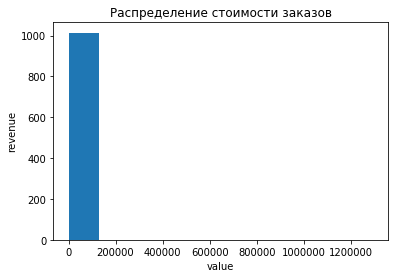

In [27]:
plt.hist(orders['revenue']) 
plt.title('Распределение стоимости заказов')
plt.xlabel('value')
plt.ylabel('revenue')
plt.show()

Неинформативно. Оценим стоимость заказов ещё одним способом:

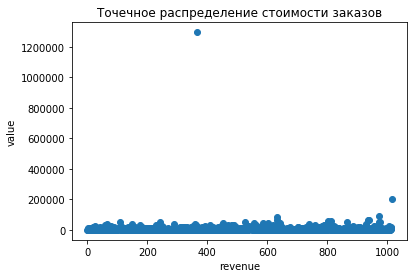

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Точечное распределение стоимости заказов')
plt.xlabel('revenue')
plt.ylabel('value')
plt.scatter(x_values, orders['revenue']) 
plt.show()

Всё, как предполагали: есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов до 10 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

Для подсчёта перцентилей применяют метод percentile() библиотеки Numpy:

In [29]:
display(np.percentile(orders['revenue'], [95, 99]))

array([26785., 53904.])

Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей. Таким образом за нижнюю границу примем значение в 26 785.


### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Начнём с подготовки данных:

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data_new = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data_new.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Напомним себе названия столбцов данных:
- <b>date</b> — дата;
- <b>ordersPerDateA</b> — количество заказов в выбранную дату в группе A;
- <b>revenuePerDateA</b> — суммарная выручка в выбранную дату в группе A;
- <b>ordersPerDateB</b> — количество заказов в выбранную дату в группе B;
- <b>revenuePerDateB</b> — суммарная выручка в выбранную дату в группе B;
- <b>ordersCummulativeA</b> — суммарное число заказов до выбранной даты включительно в группе A;
- <b>revenueCummulativeA</b> — суммарная выручка до выбранной даты включительно в группе A;
- <b>ordersCummulativeB</b> — суммарное количество заказов до выбранной даты включительно в группе B;
- <b>revenueCummulativeB</b> — суммарная выручка до выбранной даты включительно в группе B;
- <b>visitorsPerDateA</b> — количество пользователей в выбранную дату в группе A;
- <b>visitorsPerDateB</b> — количество пользователей в выбранную дату в группе B;
- <b>visitorsCummulativeA</b> — количество пользователей до выбранной даты включительно в группе A;
- <b>visitorsCummulativeB</b> — количество пользователей до выбранной даты включительно в группе B.

#### Посчитаем статистическую значимость различия в конверсии между группами.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменная sampleA должна состоять из двух частей:

1) Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'].

2) Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']). Создадим объект pd.Series нужной длины. 

In [32]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data_new['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data_new['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Список индексов создали функцией np.arange(). Она работает так же, как функция range(), только создаёт массив индексов в формате np.array, который требуется в pd.Series.

В Pandas последовательности объединяют функцией pd.concat() (от англ. concatenate, «сцеплять»). Сперва ей передают то, что объединяют — в нашем случае список из первой и второй части.

Дальше передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд): pd.concat([...], axis=0). То же делаем для sampleB и получаем:

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

Напомним, что в sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

Сформулируем нулевую и альтернативные гипотезы:

h0 - по "сырым" данным статистически значимых различий в конверсии между группами нет;

h1 - по "сырым" данным конверсия пользователей в группах различается.

In [33]:
print("Значение p-value:", "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное изменение конверсии группы B к группе А:", "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Значение p-value: 0.006
Относительное изменение конверсии группы B к группе А: 0.160


Первое число — <b>p-value = 0.006</b> меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 16% — второе число в выводе.

<b>Вывод:</b> По «сырым» данным различия в конверсии групп A и B есть.



### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.

А ещё найдём относительные различия в среднем чеке между группами:

Сформулируем нулевую и альтернативные гипотезы:

h0 - по "сырым" данным статистически значимых различий в среднем чеке между группами нет;

h1 - по "сырым" данным средний чек пользователей в группах различается.

In [34]:
print("Значение p-value:", '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительное изменение среднего чека группы B к группе А:", '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение p-value: 0.415
Относительное изменение среднего чека группы B к группе А: 0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Напомним, что найденный 95-й перцентиль среднего чека равен 26 785 рублям. А 95-й перцентиль количества заказов на одного пользователя равен 1 заказу на пользователя.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 26 785 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 1 — usersWithManyOrders и пользователей, совершивших заказы дороже 26 785 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

Узнаем, сколько всего аномальных пользователей методом shape().

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
(86,)


Получаем 86 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_new['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_new['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

Сформулируем нулевую и альтернативные гипотезы:

h0 - по "очищенным" данным статистически значимых различий в конверсии между группами нет;

h1 - по "очищенным" данным конверсия пользователей в группах различается.

In [37]:
print("Значение p-value:", '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительное изменение конверсии группы B к группе А:", '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Значение p-value: 0.008
Относительное изменение конверсии группы B к группе А: 0.174


Результаты по конверсии практически не изменились.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Произошло ли что-нибудь с результатами по среднему чеку?

Сформулируем нулевую и альтернативные гипотезы:

h0 - по "очищенным" данным статистически значимых различий в среднем чеке между группами нет;

h1 - по "очищенным" данным средний чек пользователей в группах различается.

In [38]:
print("Значение p-value",
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительное изменение среднего чека группы B к группе А:",
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Значение p-value 0.364
Относительное изменение среднего чека группы B к группе А: -0.034


P-value уменьшился, и разница между сегментами сократилась на 3%. 

### Решение по результатам теста

Какие выводы по тесту можем сделать?

<b>Имеющиеся факты:</b>
    
- Есть статистически значимое различие по конверсии между группами по «сырым» и по данным после фильтрации аномалий;
- Есть статистически значимое различия по среднему чеку между группами по «сырым» данным, после фильтрации аномалий видим снижение между сегментами;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и есть значительной тенденции к улучшению;
- График различия среднего чека говорит о том, что результаты группы B лучше почти на 30%;

Исходя из обнаруженных фактов, тест следует остановить и признать успешным. 

Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент А на самом деле лучше сегмента В — нулевая.